In [1]:
import numpy as np

def stitch_images(img1,img2,h1):

    s=np.dot(h,np.array([[*img1.shape[1::-1],1],[1,1,1],[img1.shape[1],1,1],[1,img1.shape[0],1]]).transpose())
    s=s[0:2,:]/s[2,:]
    s=np.concatenate((s,np.array([[0,img1.shape[1]],[0,img1.shape[0]]])),axis=1)

    smax=np.max(s,axis=1)
    smin=np.min(s,axis=1)

    fs=tuple(np.uint16(smax-smin))
    #fs=(fs[1],fs[0])

    h2=np.eye(3)
    if np.sum(smin)<0:
        ht=np.array([[1,0,-smin[0]],[0,1,-smin[1]],[0,0,1]])
        h1=np.dot(ht,h1)
        h2=ht

    normalizer=cv2.warpPerspective(np.ones_like(img1),h1,fs)+cv2.warpPerspective(np.ones_like(img2),h2,fs)
    normalizer[normalizer==0]=1
    im_out=(np.float32(cv2.warpPerspective(img1,h1,fs))+np.float32(cv2.warpPerspective(img2,h2,fs)))/np.float32(normalizer)
    im_out=np.uint8(im_out)
    return im_out

In [2]:
# implement this function
def myFindHomography(match_xy):
    pass

# implement this function (Extra credit: +50%)
def myRANSAC(match_xy,K):
    pass

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy.signal import convolve2d

%matplotlib inline

window_name='camera'

img1 = cv2.imread('IMAG4688.jpg')
img2 = cv2.imread('IMAG4689.jpg')

desc = cv2.xfeatures2d.SURF_create()

ratio_thresh = 0.6

kps1, descs1 = desc.detectAndCompute(cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY), None)
kps2, descs2 = desc.detectAndCompute(cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY), None)
matcher = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_FLANNBASED)
knn_matches = matcher.knnMatch(descs1, descs2, 2)

good_matches = []
for m,n in knn_matches:
    if m.distance < ratio_thresh * n.distance:
        good_matches.append(m)  

print(len(good_matches))
match_xy=np.array([[*(kps1[q.queryIdx].pt),*(kps2[q.trainIdx].pt)] for q in good_matches])

# match_xy is a matrix with each row equals x1,y1,x2,y2,
# where (x1,y1) and (x2,y2) are matched coordinates in img1 and img2, respectively

1784


1804


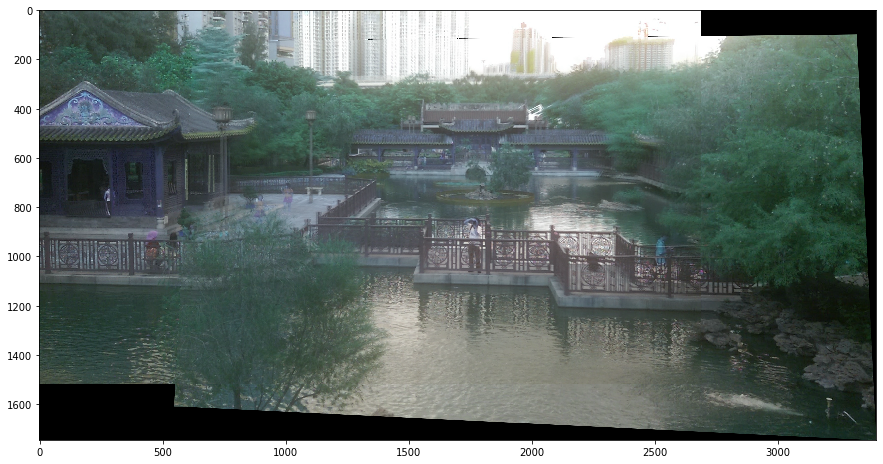

In [5]:
# implement this function
h = myFindHomography(match_xy)

plt.figure(figsize=(15,15))
plt.imshow(stitch_images(img1,img2,h))